# Chapter 5: Bits & Numbers

After learning about the basic building blocks of expressing and structuring the business logic in programs, we focus our attention on the **data types** Python offers us, both built-in and available via the [standard library](https://docs.python.org/3/library/index.html) or third-party packages.

We start with the "simple" ones: Numeric types in this chapter and textual data in [Chapter 6](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/06_text_00_lecture.ipynb). An important fact that holds for all objects of these types is that they are **immutable**. To reuse the bag analogy from [Chapter 1](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/01_elements_00_lecture.ipynb#Objects-vs.-Types-vs.-Values), this means that the $0$s and $1$s making up an object's *value* cannot be changed once the bag is created in memory, implying that any operation with or method on the object creates a *new* object in a *different* memory location.

[Chapter 7](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/07_sequences_00_lecture.ipynb), [Chapter 8](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/08_mappings_00_lecture.ipynb), and [Chapter 9](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/09_arrays_00_lecture.ipynb) then cover the more "complex" data types, including, for example, the `list` type. Finally, Chapter 10 completes the picture by introducing language constructs to create custom types.

We have already seen many hints indicating that numbers are not as trivial to work with as it seems at first sight:

- [Chapter 1](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/01_elements_00_lecture.ipynb#%28Data%29-Type-%2F-%22Behavior%22) reveals that numbers may come in *different* data types (i.e., `int` vs. `float` so far),
- [Chapter 3](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/03_conditionals_00_lecture.ipynb#Boolean-Expressions) raises questions regarding the **limited precision** of `float` numbers (e.g., `42 == 42.000000000000001` evaluates to `True`), and
- [Chapter 4](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/04_iteration_00_lecture.ipynb#Infinite-Recursion) shows that sometimes a `float` "walks" and "quacks" like an `int`, whereas the reverse is true in other cases.

This chapter introduces all the [built-in numeric types](https://docs.python.org/3/library/stdtypes.html#numeric-types-int-float-complex): `int`, `float`, and `complex`. To mitigate the limited precision of floating-point numbers, we also look at two replacements for the `float` type in the [standard library](https://docs.python.org/3/library/index.html), namely the `Decimal` type in the [decimals](https://docs.python.org/3/library/decimal.html#decimal.Decimal) and the `Fraction` type in the [fractions](https://docs.python.org/3/library/fractions.html#fractions.Fraction) module.

## The `int` Type

The simplest numeric type is the `int` type: It behaves like an [integer in ordinary math](https://en.wikipedia.org/wiki/Integer) (i.e., the set $\mathbb{Z}$) and supports operators in the way we saw in the section on arithmetic operators in [Chapter 1](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/01_elements_00_lecture.ipynb#%28Arithmetic%29-Operators).

In [1]:
a = 42

Just like any other object, the `42` has an identity, a type, and a value.

In [2]:
id(a)

94315929536576

In [3]:
type(a)

int

In [4]:
a

42

A nice feature in newer Python versions is using underscores `_` as (thousands) separators in numeric literals. For example, `1_000_000` evaluates to `1000000` in memory; the `_` is simply ignored by the interpreter.

In [5]:
1_000_000

1000000

The `int` type follows all rules we know from math, apart from one exception: Whereas mathematicians argue what the term $0^0$ means (cf., this [article](https://en.wikipedia.org/wiki/Zero_to_the_power_of_zero)), programmers are pragmatic about this and define $0^0 = 1$.

In [6]:
0 ** 0

1

### Binary Representations

As computers can only store $0$s and $1$s, `int` objects are nothing but that in memory as well. Consequently, computer scientists and engineers developed conventions as to how $0$s and $1$s are "translated" into integers, and one such convention is the **[binary representation](https://en.wikipedia.org/wiki/Binary_number)** of **non-negative integers**. Consider the integers from $0$ through $255$ that are encoded into $0$s and $1$s with the help of this table:

|Bit $i$|  7  |  6  |  5  |  4  |  3  |  2  |  1  |  0  |
|-------|-----|-----|-----|-----|-----|-----|-----|-----|
| Digit |$2^7$|$2^6$|$2^5$|$2^4$|$2^3$|$2^2$|$2^1$|$2^0$|
|  $=$  |$128$| $64$| $32$| $16$| $8$ | $4$ | $2$ | $1$ |

A number consists of exactly eight $0$s and $1$s that are read from right to left and referred to as the **bits** of the number. Each bit represents a distinct multiple of $2$, the **digit**. For sure, we start counting at $0$ again.

To encode the integer $3$, for example, we need to find a combination of $0$s and $1$s such that the sum of digits marked with a $1$ is equal to the number we want to encode. In the example, we set all bits to $0$ except for the first ($i=0$) and second ($i=1$) as $2^0 + 2^1 = 1 + 2 = 3$. So the binary representation of $3$ is $00~00~00~11$. To borrow some terminology from linear algebra, the $3$ is a linear combination of the digits where the coefficients are either $0$ or $1$: $3 = 0*128 + 0*64 + 0*32 + 0*16 + 0*8 + 0*4 + 1*2 + 1*1$. It is *guaranteed* that there is exactly *one* such combination for each number between $0$ and $255$.

As each bit in the binary representation is one of two values, we say that this representation has a base of $2$. Often, the base is indicated with a subscript to avoid confusion. For example, we write $3_{10} = 00000011_2$ or $3_{10} = 11_2$ for short omitting leading $0$s. A subscript of $10$ implies a decimal number as we know it from elementary school.

We use the built-in [bin()](https://docs.python.org/3/library/functions.html#bin) function to obtain an `int` object's binary representation: It returns a `str` object starting with `"0b"` indicating the binary format and as many $0$s and $1$s as are necessary to encode the integer omitting leading $0$s.

In [7]:
bin(3)

'0b11'

We may pass a `str` object formatted this way as the argument to the [int()](https://docs.python.org/3/library/functions.html#int) built-in, together with `base=2`, to create an `int` object, for example, with the value of `3`.

In [8]:
int("0b11", base=2)

3

Moreover, we may also use the contents of the returned `str` object as a **literal** instead: Just like we type, for example, `3` without quotes (i.e., "literally") into a code cell to create the `int` object `3`, we may type `0b11` to obtain an `int` object with the same value.

In [9]:
0b11

3

It is convenient to use the underscore `_` to separate the `"0b"` prefix from the bits.

In [10]:
0b_11

3

Another example is the integer `123` that is the sum of $64 + 32 + 16 + 8 + 2 + 1$: Thus, its binary representation is the sequence of bits $01~11~10~11$, or to use our new notation, $123_{10} = 1111011_2$.

In [11]:
bin(123)

'0b1111011'

Analogous to typing `123` into a code cell, we may write `0b1111011`, or `0b_111_1011` to make use of the underscores, and create an `int` object with the value `123`.

In [12]:
0b_111_1011

123

`0` and `255` are the edge cases where we set all the bits to either $0$ or $1$.

In [13]:
bin(0)

'0b0'

In [14]:
bin(1)

'0b1'

In [15]:
bin(2)

'0b10'

In [16]:
bin(255)

'0b11111111'

Groups of eight bits are also called a **byte**. As a byte can only represent non-negative integers up to $255$, the table above is extended conceptually with greater digits to the left to model integers beyond $255$. The memory management needed to implement this is built into Python, and we do not need to worry about it.

For example, `789` is encoded with ten bits and $789_{10} = 1100010101_2$.

In [17]:
bin(789)

'0b1100010101'

To contrast this bits encoding with the familiar decimal system, we show an equivalent table with powers of $10$ as the digits:

|Decimal|   3  |   2  |   1  |   0  |
|-------|------|------|------|------|
| Digit |$10^3$|$10^2$|$10^1$|$10^0$|
|  $=$  |$1000$| $100$| $10$ |  $1$ |

Now, an integer is a linear combination of the digits where the coefficients are one of *ten* values, and the base is now $10$. For example, the number $123$ can be expressed as $0*1000 + 1*100 + 2*10 + 3*1$. So, the binary representation follows the same logic as the decimal system taught in elementary school. The decimal system is intuitive to us humans, mostly as we learn to count with our *ten* fingers. The $0$s and $1$s in a computer's memory are therefore no rocket science; they only feel unintuitive for a beginner.

#### Arithmetic with Bits

Adding two numbers in their binary representations is straightforward and works just like we all learned addition in elementary school. Going from right to left, we add the individual digits, and ...

In [18]:
1 + 2

3

In [19]:
bin(1) + " + " + bin(2) + " = " + bin(3)

'0b1 + 0b10 = 0b11'

... if any two digits add up to $2$, the resulting digit is $0$ and a $1$ carries over.

In [20]:
1 + 3

4

In [21]:
bin(1) + " + " + bin(3) + " = " + bin(4)

'0b1 + 0b11 = 0b100'

Multiplication is also quite easy. All we need to do is to multiply the left operand by all digits of the right operand separately and then add up the individual products, just like in elementary school.

In [22]:
4 * 3

12

In [23]:
bin(4) + " * " + bin(3) + " = " + bin(12)

'0b100 * 0b11 = 0b1100'

In [24]:
bin(4) + " * " + bin(1) + " = " + bin(4)  # multiply with first digit

'0b100 * 0b1 = 0b100'

In [25]:
bin(4) + " * " + bin(2) + " = " + bin(8)  # multiply with second digit

'0b100 * 0b10 = 0b1000'

The "*Further Resources*" section at the end of this chapter provides video tutorials on addition and multiplication in binary. Subtraction and division are a bit more involved but essentially also easy to understand.

### Hexadecimal Representations

While in the binary and decimal systems there are two and ten distinct coefficients per digit, another convenient representation, the **hexadecimal representation**, uses a base of $16$. It is convenient as one digit stores the same amount of information as *four* bits and the binary representation quickly becomes unreadable for larger numbers. The letters "a" through "f" are used as digits "10" through "15".

The following table summarizes the relationship between the three systems:

|Decimal|Hexadecimal|Binary|$~~~~~~$|Decimal|Hexadecimal|Binary|$~~~~~~$|Decimal|Hexadecimal|Binary|$~~~~~~$|...|
|-------|-----------|------|--------|-------|-----------|------|--------|-------|-----------|------|--------|---|
|   0   |     0     | 0000 |$~~~~~~$|  16   |    10     | 10000|$~~~~~~$|  32   |    20     |100000|$~~~~~~$|...|
|   1   |     1     | 0001 |$~~~~~~$|  17   |    11     | 10001|$~~~~~~$|  33   |    21     |100001|$~~~~~~$|...|
|   2   |     2     | 0010 |$~~~~~~$|  18   |    12     | 10010|$~~~~~~$|  34   |    22     |100010|$~~~~~~$|...|
|   3   |     3     | 0011 |$~~~~~~$|  19   |    13     | 10011|$~~~~~~$|  35   |    23     |100011|$~~~~~~$|...|
|   4   |     4     | 0100 |$~~~~~~$|  20   |    14     | 10100|$~~~~~~$|  36   |    24     |100100|$~~~~~~$|...|
|   5   |     5     | 0101 |$~~~~~~$|  21   |    15     | 10101|$~~~~~~$|  37   |    25     |100101|$~~~~~~$|...|
|   6   |     6     | 0110 |$~~~~~~$|  22   |    16     | 10110|$~~~~~~$|  38   |    26     |100110|$~~~~~~$|...|
|   7   |     7     | 0111 |$~~~~~~$|  23   |    17     | 10111|$~~~~~~$|  39   |    27     |100111|$~~~~~~$|...|
|   8   |     8     | 1000 |$~~~~~~$|  24   |    18     | 11000|$~~~~~~$|  40   |    28     |101000|$~~~~~~$|...|
|   9   |     9     | 1001 |$~~~~~~$|  25   |    19     | 11001|$~~~~~~$|  41   |    29     |101001|$~~~~~~$|...|
|  10   |     a     | 1010 |$~~~~~~$|  26   |    1a     | 11010|$~~~~~~$|  42   |    2a     |101010|$~~~~~~$|...|
|  11   |     b     | 1011 |$~~~~~~$|  27   |    1b     | 11011|$~~~~~~$|  43   |    2b     |101011|$~~~~~~$|...|
|  12   |     c     | 1100 |$~~~~~~$|  28   |    1c     | 11100|$~~~~~~$|  44   |    2c     |101100|$~~~~~~$|...|
|  13   |     d     | 1101 |$~~~~~~$|  29   |    1d     | 11101|$~~~~~~$|  45   |    2d     |101101|$~~~~~~$|...|
|  14   |     e     | 1110 |$~~~~~~$|  30   |    1e     | 11110|$~~~~~~$|  46   |    2e     |101110|$~~~~~~$|...|
|  15   |     f     | 1111 |$~~~~~~$|  31   |    1f     | 11111|$~~~~~~$|  47   |    2f     |101111|$~~~~~~$|...|

To show more examples of the above subscript convention, we pick three random entries from the table:

$11_{10} = \text{b}_{16} = 1011_2$

$25_{10} = 19_{16} = 11001_2$

$46_{10} = 2\text{e}_{16} = 101110_2$

The built-in [hex()](https://docs.python.org/3/library/functions.html#hex) function creates a `str` object starting with `"0x"` representing an `int` object's hexadecimal representation. The length depends on how many groups of four bits are implied by the corresponding binary representation.

For `0` and `1`, the hexadecimal representation is similar to the binary one.

In [26]:
hex(0)

'0x0'

In [27]:
hex(1)

'0x1'

Whereas `bin(3)` already requires two digits, one is enough for `hex(3)`.

In [28]:
hex(3)  # bin(3) => "0b11"; two digits needed

'0x3'

For `10` and `15`, we see the letter digits for the first time.

In [29]:
hex(10)

'0xa'

In [30]:
hex(15)

'0xf'

The binary representation of `123`, `0b_111_1011`, can be viewed as *two* groups of four bits, $0111$ and $1011$, that are encoded as $7$ and $\text{b}$ in hexadecimal (cf., table above).

In [31]:
bin(123)

'0b1111011'

In [32]:
hex(123)

'0x7b'

To obtain a *new* `int` object with the value `123`, we call the [int()](https://docs.python.org/3/library/functions.html#int) built-in with a properly formatted `str` object and `base=16` as arguments.

In [33]:
int("0x7b", base=16)

123

Alternatively, we could use a literal notation instead.

In [34]:
0x_7b

123

Hexadecimals between $00_{16}$ and $\text{ff}_{16}$ (i.e., $0_{10}$ and $255_{10}$) are commonly used to describe colors, for example, in web development but also graphics editors. See this [online tool](https://www.w3schools.com/colors/colors_hexadecimal.asp) for some more background.

In [35]:
hex(0)

'0x0'

In [36]:
hex(255)

'0xff'

Just like binary representations, the hexadecimals extend to the left for larger numbers like `789`.

In [37]:
hex(789)

'0x315'

For completeness sake, we mention that there is also the [oct()](https://docs.python.org/3/library/functions.html#oct) built-in to obtain an integer's **octal representation**. The logic is the same as for the hexadecimal representation, and we use *eight* instead of *sixteen* digits. That is the equivalent of viewing the binary representations in groups of three bits. As of today, octal representations have become less important, and the data science practitioner may probably live without them quite well.

### Negative Values

While there are conventions that model negative integers with $0$s and $1$s in memory (cf., [Two's Complement](https://en.wikipedia.org/wiki/Two%27s_complement)), Python manages that for us, and we do not look into the theory here for brevity. We have learned all that a practitioner needs to know about how integers are modeled in a computer. The "*Further Resources*" section at the end of this chapter provides a video tutorial on how the [Two's Complement](https://en.wikipedia.org/wiki/Two%27s_complement) idea works.

The binary and hexadecimal representations of negative integers are identical to their positive counterparts except that they start with a minus sign `-`. However, as the video tutorial at the end of the chapter reveals, that is *not* how the bits are organized in memory.

In [38]:
bin(-3)

'-0b11'

In [39]:
hex(-3)

'-0x3'

In [40]:
bin(-255)

'-0b11111111'

In [41]:
hex(-255)

'-0xff'

### The `bool` Type

Whereas the boolean literals `True` and `False` are commonly *not* regarded as numeric types, they behave like `1` and `0` in an arithmetic context.

In [42]:
True + False

1

In [43]:
41 + True

42

In [44]:
42.87 * False

0.0

We may explicitly cast `bool` objects as integers ourselves with the [int()](https://docs.python.org/3/library/functions.html#int) built-in.

In [45]:
int(True)

1

In [46]:
int(False)

0

Of course, their binary representations only need *one* bit of information.

In [47]:
bin(True)

'0b1'

In [48]:
bin(False)

'0b0'

Their hexadecimal representations occupy *four* bits in memory while only *one* bit is needed. This is because "1" and "0" are just two of the sixteen possible digits.

In [49]:
hex(True)

'0x1'

In [50]:
hex(False)

'0x0'

As a reminder, the `None` object is a type on its own, namely the `NoneType`, and different from `False`. It *cannot* be cast as an integer as the `TypeError` indicates.

In [51]:
int(None)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

### Bitwise Operators

Now that we know how integers are represented with $0$s and $1$s, we look at ways of working with the individual bits, in particular with the so-called **[bitwise operators](https://wiki.python.org/moin/BitwiseOperators)**: As the name suggests, the operators perform some operation on a bit by bit basis. They only work with and always return `int` objects.

We keep this overview rather short as such "low-level" operations are not needed by the data science practitioner regularly. Yet, it is worthwhile to have heard about them as they form the basis of all of arithmetic in computers.

The first operator is the **bitwise AND** operator `&`: It looks at the bits of its two operands, `11` and `13` in the example, in a pairwise fashion and if *both* operands have a $1$ in the *same* position, the resulting integer will have a $1$ in this position as well. Otherwise, the resulting integer will have a $0$ in this position. The binary representations of `11` and `13` both have $1$s in their respective first and fourth bits, which is why `bin(11 & 13)` evaluates to `Ob_1001` or `9`.

In [52]:
11 & 13

9

In [53]:
bin(11) + " & " + bin(13)  # to show the operands' bits

'0b1011 & 0b1101'

In [54]:
bin(11 & 13)

'0b1001'

`0b_1001` is the binary representation of `9`.

In [55]:
0b_1001

9

The **bitwise OR** operator `|` evaluates to an `int` object whose bits are set to $1$ if the corresponding bits of either *one* or *both* operands are $1$. So in the example `9 | 13` only the second bit is $0$ for both operands, which is why the expression evaluates to `0b_1101` or `13`.

In [56]:
9 | 13

13

In [57]:
bin(9) + " | " + bin(13)  # to show the operands' bits

'0b1001 | 0b1101'

In [58]:
bin(9 | 13)

'0b1101'

`0b_1101` evaluates to an `int` object with the value `13`.

In [59]:
0b_1101

13

The **bitwise XOR** operator `^` is a special case of the `|` operator in that it evaluates to an `int` object whose bits are set to $1$ if the corresponding bit of *exactly one* of the two operands is $1$. Colloquially, the "X" stands for "exclusive." The `^` operator must *not* be confused with the exponentiation operator `**`! In the example, `9 ^ 13`, only the third bit differs between the two operands, which is why it evaluates to `0b_100` omitting the leading $0$.

In [60]:
9 ^ 13

4

In [61]:
bin(9) + " ^ " + bin(13)  # to show the operands' bits

'0b1001 ^ 0b1101'

In [62]:
bin(9 ^ 13)

'0b100'

`0b_100` evaluates to an `int` object with the value `4`.

In [63]:
0b_100

4

The **bitwise NOT** operator `~`, sometimes also called **inversion** operator, is said to "flip" the $0$s into $1$s and the $1$s into $0$s. However, it is based on the aforementioned [Two's Complement](https://en.wikipedia.org/wiki/Two%27s_complement) convention and `~x = -(x + 1)` by definition (cf., the [reference](https://docs.python.org/3/reference/expressions.html#unary-arithmetic-and-bitwise-operations)). The full logic behind this, while actually quite simple, is considered out of scope in this book.

We can at least verify the definition by comparing the binary representations of `7` and `-8`: They are indeed the same.

In [64]:
~7

-8

In [65]:
~7 == -(7 + 1)  # = Two's Complement

True

In [66]:
bin(~7)

'-0b1000'

In [67]:
bin(-(7 + 1))

'-0b1000'

`~x = -(x + 1)` can be reformulated as `~x + x = -1`, which is slightly easier to check.

In [68]:
~7 + 7

-1

Lastly, the **bitwise left and right shift** operators, `<<` and `>>`, shift all the bits either to the left or to the right. This corresponds to multiplying or dividing an integer by powers of `2`.

When shifting left, $0$s are filled in.

In [69]:
7 << 2

28

In [70]:
bin(7)

'0b111'

In [71]:
bin(7 << 2)

'0b11100'

In [72]:
0b_1_1100

28

When shifting right, some bits are always lost.

In [73]:
7 >> 1

3

In [74]:
bin(7)

'0b111'

In [75]:
bin(7 >> 1)

'0b11'

In [76]:
0b_11

3

## The `float` Type

As we have seen above, some assumptions need to be made as to how the $0$s and $1$s in a computer's memory are to be translated into numbers. This process becomes a lot more involved when we go beyond integers and model [real numbers](https://en.wikipedia.org/wiki/Real_number) (i.e., the set $\mathbb{R}$) with possibly infinitely many digits to the right of the period like $1.23$.

The **[Institute of Electrical and Electronics Engineers](https://en.wikipedia.org/wiki/Institute_of_Electrical_and_Electronics_Engineers)** (IEEE, pronounced "eye-triple-E") is one of the important professional associations when it comes to standardizing all kinds of aspects regarding the implementation of soft- and hardware.

The **[IEEE 754](https://en.wikipedia.org/wiki/IEEE_754)** standard defines the so-called **floating-point arithmetic** that is commonly used today by all major programming languages. The standard not only defines how the $0$s and $1$s are organized in memory but also, for example, how values are to be rounded, what happens in exceptional cases like divisions by zero, or what is a zero value in the first place.

In Python, the simplest way to create a `float` object is to use a literal notation with a dot `.` in it.

In [77]:
b = 42.0

In [78]:
id(b)

139674754277776

In [79]:
type(b)

float

In [80]:
b

42.0

As with integer literals above, we may use underscores `_` to make longer `float` objects easier to read.

In [81]:
0.123_456_789

0.123456789

In cases where the dot `.` is unnecessary from a mathematical point of view, we either need to end the number with it nevertheless or use the [float()](https://docs.python.org/3/library/functions.html#float) built-in to cast the number explicitly. [float()](https://docs.python.org/3/library/functions.html#float) can process any numeric object or a properly formatted `str` object.

In [82]:
42.

42.0

In [83]:
float(42)

42.0

In [84]:
float("42")

42.0

Leading and trailing whitespace is ignored ...

In [85]:
float(" 42.87 ")

42.87

... but not whitespace in between.

In [86]:
float("42. 87")

ValueError: could not convert string to float: '42. 87'

`float` objects are implicitly created as the result of dividing an `int` object by another with the division operator `/`.

In [87]:
1 / 3

0.3333333333333333

In general, if we combine `float` and `int` objects in arithmetic operations, we always end up with a `float` type: Python uses the "broader" representation.

In [88]:
40.0 + 2

42.0

In [89]:
21 * 2.0

42.0

### Scientific Notation

`float` objects may also be created with the **scientific literal notation**: We use the symbol `e` to indicate powers of $10$, so $1.23 * 10^0$ translates into `1.23e0`.

In [90]:
1.23e0

1.23

Syntactically, `e` needs a `float` or `int` object in its literal notation on its left and an `int` object on its right, both without a space. Otherwise, we get a `SyntaxError`.

In [91]:
1.23 e0

SyntaxError: invalid syntax (<ipython-input-91-1b5daaac0077>, line 1)

In [92]:
1.23e 0

SyntaxError: invalid syntax (<ipython-input-92-a236c4a30231>, line 1)

In [93]:
1.23e0.0

SyntaxError: invalid syntax (<ipython-input-93-05b9072d76be>, line 1)

If we leave out the number to the left, Python raises a `NameError` as it unsuccessfully tries to look up a variable named `e0`.

In [94]:
e0

NameError: name 'e0' is not defined

So, to write $10^0$ in Python, we need to think of it as $1*10^0$ and write `1e0`.

In [95]:
1e0

1.0

To express thousands of something (i.e., $10^3$), we write `1e3`.

In [96]:
1e3  # = thousands

1000.0

Similarly, to express, for example, milliseconds (i.e., $10^{-3} s$), we write `1e-3`.

In [97]:
1e-3  # = milli

0.001

### Special Values

There are also three special values representing "**not a number,**" called `nan`, and positive or negative **infinity**, called `inf` or `-inf`, that are created by passing in the corresponding abbreviation as a `str` object to the [float()](https://docs.python.org/3/library/functions.html#float) built-in. These values could be used, for example, as the result of a mathematically undefined operation like division by zero or to model the value of a mathematical function as it goes to infinity.

In [98]:
float("nan")  # also float("NaN")

nan

In [99]:
float("+inf")  # also float("+infinity") or float("infinity")

inf

In [100]:
float("inf")  # same as float("+inf")

inf

In [101]:
float("-inf")

-inf

`nan` objects *never* compare equal to *anything*, not even to themselves. This happens in accordance with the [IEEE 754](https://en.wikipedia.org/wiki/IEEE_754) standard.

In [102]:
float("nan") == float("nan")

False

Another caveat is that any arithmetic involving a `nan` object results in `nan`. In other words, the addition below **fails silently** as no error is raised. As this also happens in accordance with the [IEEE 754](https://en.wikipedia.org/wiki/IEEE_754) standard, we *need* to be aware of that and check any data we work with for any `nan` occurrences *before* doing any calculations.

In [103]:
42 + float("nan")

nan

On the contrary, as two values go to infinity, there is no such concept as difference and *everything* compares equal.

In [104]:
float("inf") == float("inf")

True

Adding `42` to `inf` makes no difference.

In [105]:
float("inf") + 42

inf

In [106]:
float("inf") + 42 == float("inf")

True

We observe the same for multiplication ...

In [107]:
42 * float("inf")

inf

In [108]:
42 * float("inf") == float("inf")

True

... and even exponentiation!

In [109]:
float("inf") ** 42

inf

In [110]:
float("inf") ** 42 == float("inf")

True

Although absolute differences become unmeaningful as we approach infinity, signs are still respected.

In [111]:
-42 * float("-inf")

inf

In [112]:
-42 * float("-inf") == float("inf")

True

As a caveat, adding infinities of different signs is an *undefined operation* in math and results in a `nan` object. So, if we (accidentally or unknowingly) do this on a real dataset, we do *not* see any error messages, and our program may continue to run with non-meaningful results! This is another example of a piece of code **failing silently**.

In [113]:
float("inf") + float("-inf")

nan

In [114]:
float("inf") - float("inf")

nan

### Imprecision

`float` objects are *inherently* imprecise, and there is *nothing* we can do about it! In particular, arithmetic operations with two `float` objects may result in "weird" rounding "errors" that are strictly deterministic and occur in accordance with the [IEEE 754](https://en.wikipedia.org/wiki/IEEE_754) standard.

For example, let's add `1` to `1e15` and `1e16`, respectively. In the latter case, the `1` somehow gets "lost."

In [115]:
1e15 + 1

1000000000000001.0

In [116]:
1e16 + 1

1e+16

Interactions between sufficiently large and small `float` objects are not the only source of imprecision.

In [117]:
from math import sqrt

In [118]:
sqrt(2) ** 2

2.0000000000000004

In [119]:
0.1 + 0.2

0.30000000000000004

This may become a problem if we rely on equality checks in our programs.

In [120]:
sqrt(2) ** 2 == 2

False

In [121]:
0.1 + 0.2 == 0.3

False

A popular workaround is to benchmark the difference between the two numbers to be checked for equality against a pre-defined `threshold` *sufficiently* close to `0`, for example, `1e-15`.

In [122]:
threshold = 1e-15

In [123]:
(sqrt(2) ** 2) - 2 < threshold

True

In [124]:
(0.1 + 0.2) - 0.3 < threshold

True

The built-in [format()](https://docs.python.org/3/library/functions.html#format) function allows us to show the **significant digits** of a `float` number as they exist in memory to arbitrary precision. To exemplify it, let's view a couple of `float` objects with `50` digits. This analysis reveals that almost no `float` number is precise! After $14$ or $15$ digits "weird" things happen. As we see further below, the "random" digits ending the `float` numbers do *not* "physically" exist in memory.

The [format()](https://docs.python.org/3/library/functions.html#format) function is different from the [format()](https://docs.python.org/3/library/stdtypes.html#str.format) method on `str` objects introduced in the next chapter and both work with the so-called [format specification mini-language](https://docs.python.org/3/library/string.html#format-specification-mini-language): `".50f"` is the instruction to show `50` digits of a `float` number. But let's not worry too much about these details for now.

In [125]:
format(0.1, ".50f")

'0.10000000000000000555111512312578270211815834045410'

In [126]:
format(0.2, ".50f")

'0.20000000000000001110223024625156540423631668090820'

In [127]:
format(0.3, ".50f")

'0.29999999999999998889776975374843459576368331909180'

In [128]:
format(1 / 3, ".50f")

'0.33333333333333331482961625624739099293947219848633'

The [format()](https://docs.python.org/3/library/functions.html#format) function does *not* round a `float` object in the mathematical sense! It just allows us to show an arbitrary number of the digits as stored in memory, and it also does *not* change these.

On the contrary, the built-in [round()](https://docs.python.org/3/library/functions.html#round) function creates a *new* numeric object that is a rounded version of the one passed in as the argument. It adheres to the common rules of math.

For example, let's round `1 / 3` to five decimals. The obtained value for `roughly_a_third` is also *imprecise* but different from the "exact" representation of `1 / 3` above.

In [129]:
roughly_a_third = round(1 / 3, 5)

In [130]:
roughly_a_third

0.33333

In [131]:
format(roughly_a_third, ".50f")

'0.33333000000000001517008740847813896834850311279297'

Surprisingly, `0.125` and `0.25` appear to be *precise*, and equality comparison works without the `threshold` workaround: Both are powers of $2$ in disguise.

In [132]:
format(0.125, ".50f")

'0.12500000000000000000000000000000000000000000000000'

In [133]:
format(0.25, ".50f")

'0.25000000000000000000000000000000000000000000000000'

In [134]:
0.125 + 0.125 == 0.25

True

### Binary Representations

To understand these subtleties, we need to look at the **[binary representation of floats](https://en.wikipedia.org/wiki/Double-precision_floating-point_format)** and review the basics of the **[IEEE 754](https://en.wikipedia.org/wiki/IEEE_754)** standard. On modern machines, floats are modeled in so-called double precision with $64$ bits that are grouped as in the figure below. The first bit determines the sign ($0$ for plus, $1$ for minus), the next $11$ bits represent an $exponent$ term, and the last $52$ bits resemble the actual significant digits, the so-called $fraction$ part. The three groups are put together like so:

$$float = (-1)^{sign} * 1.fraction * 2^{exponent-1023}$$

A $1.$ is implicitly prepended as the first digit, and both, $fraction$ and $exponent$, are stored in base $2$ representation (i.e., they both are interpreted like integers above). As $exponent$ is consequently non-negative, between $0_{10}$ and $2047_{10}$ to be precise, the $-1023$, called the exponent bias, centers the entire $2^{exponent-1023}$ term around $1$ and allows the period within the $1.fraction$ part be shifted into either direction by the same amount. Floating-point numbers received their name as the period, formally called the **[radix point](https://en.wikipedia.org/wiki/Radix_point)**, "floats" along the significant digits. As an aside, an $exponent$ of all $0$s or all $1$s is used to model the special values `nan` or `inf`.

As the standard defines the exponent part to come as a power of $2$, we now see why `0.125` is a *precise* float: It can be represented as a power of $2$, i.e., $0.125 = (-1)^0 * 1.0 * 2^{1020-1023} = 2^{-3} = \frac{1}{8}$. In other words, the floating-point representation of $0.125_{10}$ is $0_2$, $1111111100_2 = 1020_{10}$, and $0_2$ for the three groups, respectively.

<img src="static/floating_point.png" width="85%" align="center">

The crucial fact for the data science practitioner to understand is that mapping the *infinite* set of the real numbers $\mathbb{R}$ to a *finite* set of bits leads to the imprecisions shown above!

So, floats are usually good approximations of real numbers only with their first $14$ or $15$ digits. If more precision is required, we need to revert to other data types such as a `Decimal` or a `Fraction`, as shown in the next two sections.

This [blog post](http://fabiensanglard.net/floating_point_visually_explained/) gives another neat and *visual* way as to how to think of floats. It also explains why floats become worse approximations of the reals as their absolute values increase.

The Python [documentation](https://docs.python.org/3/tutorial/floatingpoint.html) provides another good discussion of floats and the goodness of their approximations.

If we are interested in the exact bits behind a `float` object, we use the [hex()](https://docs.python.org/3/library/stdtypes.html#float.hex) method that returns a `str` object beginning with `"0x1."` followed by the $fraction$ in hexadecimal notation and the $exponent$ as an integer after subtraction of $1023$ and separated by a `"p"`.

In [135]:
one_eighth = 1 / 8

In [136]:
one_eighth.hex()

'0x1.0000000000000p-3'

Also, the [as_integer_ratio()](https://docs.python.org/3/library/stdtypes.html#float.as_integer_ratio) method returns the two smallest integers whose ratio best approximates a `float` object.

In [137]:
one_eighth.as_integer_ratio()

(1, 8)

In [138]:
roughly_a_third.hex()

'0x1.555475a31a4bep-2'

In [139]:
roughly_a_third.as_integer_ratio()

(3002369727582815, 9007199254740992)

`0.0` is also a power of $2$ and thus a *precise* `float` number.

In [140]:
zero = 0.0

In [141]:
zero.hex()

'0x0.0p+0'

In [142]:
zero.as_integer_ratio()

(0, 1)

As seen in [Chapter 1](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/01_elements_00_lecture.ipynb#%28Data%29-Type-%2F-%22Behavior%22), the [is_integer()](https://docs.python.org/3/library/stdtypes.html#float.is_integer) method tells us if a `float` can be casted as an `int` object without any loss in precision.

In [143]:
roughly_a_third.is_integer()

False

In [144]:
one = roughly_a_third / roughly_a_third

one.is_integer()

True

As the exact implementation of floats may vary and be dependent on a particular Python installation, we look up the [float_info](https://docs.python.org/3/library/sys.html#sys.float_info) attribute in the [sys](https://docs.python.org/3/library/sys.html) module in the [standard library](https://docs.python.org/3/library/index.html) to check the details. Usually, this is not necessary.

In [145]:
import sys

In [146]:
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

## The `Decimal` Type

The [decimal](https://docs.python.org/3/library/decimal.html) module in the [standard library](https://docs.python.org/3/library/index.html) provides a [Decimal](https://docs.python.org/3/library/decimal.html#decimal.Decimal) type that may be used to represent any real number to a user-defined level of precision: "User-defined" does *not* mean an infinite or exact precision! The `Decimal` type merely allows us to work with a number of bits *different* from the $64$ as specified for the `float` type and also to customize the rounding rules and some other settings.

We import the `Decimal` type and also the [getcontext()](https://docs.python.org/3/library/decimal.html#decimal.getcontext) function from the [decimal](https://docs.python.org/3/library/decimal.html) module.

In [147]:
from decimal import Decimal, getcontext

[getcontext()](https://docs.python.org/3/library/decimal.html#decimal.getcontext) shows us how the [decimal](https://docs.python.org/3/library/decimal.html) module is set up. By default, the precision is set to `28` significant digits, which is roughly twice as many as with `float` objects.

In [148]:
getcontext()

Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])

The two simplest ways to create a `Decimal` object is to either **instantiate** it with an `int` or a `str` object consisting of all the significant digits. In the latter case, the scientific notation is also possible.

In [149]:
Decimal(42)

Decimal('42')

In [150]:
Decimal("0.1")

Decimal('0.1')

In [151]:
Decimal("1e-3")

Decimal('0.001')

It is *not* a good idea to create a `Decimal` from a `float` object. If we did so, we would create a `Decimal` object that internally used extra bits to store the "random" digits that are not stored in the `float` object in the first place.

In [152]:
Decimal(0.1)  # do not do this

Decimal('0.1000000000000000055511151231257827021181583404541015625')

With the `Decimal` type, the imprecisions in the arithmetic and equality comparisons from above go away.

In [153]:
Decimal("0.1") + Decimal("0.2")

Decimal('0.3')

In [154]:
Decimal("0.1") + Decimal("0.2") == Decimal("0.3")

True

`Decimal` numbers *preserve* the **significant digits**, even in cases where this is not needed.

In [155]:
Decimal("0.10000") + Decimal("0.20000")

Decimal('0.30000')

In [156]:
Decimal("0.10000") + Decimal("0.20000") == Decimal("0.3")

True

Arithmetic operations between `Decimal` and `int` objects work as the latter are inherently precise: The results are *new* `Decimal` objects.

In [157]:
21 + Decimal(21)

Decimal('42')

In [158]:
10 * Decimal("4.2")

Decimal('42.0')

In [159]:
Decimal(1) / 10

Decimal('0.1')

To verify the precision, we apply the built-in [format()](https://docs.python.org/3/library/functions.html#format) function to the previous code cell and compare it with the same division resulting in a `float` object.

In [160]:
format(Decimal(1) / 10, ".50f")

'0.10000000000000000000000000000000000000000000000000'

In [161]:
format(1 / 10, ".50f")

'0.10000000000000000555111512312578270211815834045410'

However, mixing `Decimal` and `float` objects raises a `TypeError`: So, Python prevents us from potentially introducing imprecisions via innocent-looking arithmetic by **failing loudly**.

In [162]:
1.0 * Decimal(42)

TypeError: unsupported operand type(s) for *: 'float' and 'decimal.Decimal'

To preserve the precision for more advanced mathematical functions, `Decimal` objects come with many **methods bound** on them. For example, [ln()](https://docs.python.org/3/library/decimal.html#decimal.Decimal.ln) and [log10()](https://docs.python.org/3/library/decimal.html#decimal.Decimal.log10) take the logarithm while [sqrt()](https://docs.python.org/3/library/decimal.html#decimal.Decimal.sqrt) calculates the square root. The methods always return a *new* `Decimal` object. We must never use the functions in the [math](https://docs.python.org/3/library/math.html) module in the [standard library](https://docs.python.org/3/library/index.html) with `Decimal` objects as they do *not* preserve precision.

In [163]:
Decimal(100).log10()

Decimal('2')

In [164]:
Decimal(2).sqrt()

Decimal('1.414213562373095048801688724')

The object returned by the [sqrt()](https://docs.python.org/3/library/decimal.html#decimal.Decimal.sqrt) method is still limited in precision: This must be so as, for example, $\sqrt{2}$ is an **[irrational number](https://en.wikipedia.org/wiki/Irrational_number)** that *cannot* be expressed with absolute precision using *any* number of bits, even in theory.

We see this as raising $\sqrt{2}$ to the power of $2$ results in an imprecise value as before!

In [165]:
two = Decimal(2).sqrt() ** 2

two

Decimal('1.999999999999999999999999999')

However, the [quantize()](https://docs.python.org/3/library/decimal.html#decimal.Decimal.quantize) method allows us to [quantize](https://www.dictionary.com/browse/quantize) (i.e., "round") a `Decimal` number at any precision that is *smaller* than the set precision. It takes the number of decimals to the right of the period of the `Decimal` argument we pass in and rounds accordingly.

For example, as the overall imprecise value of `two` still has an internal precision of `28` digits, we can correctly round it to *four* decimals (i.e., `Decimal("0.0000")` has four decimals).

In [166]:
two.quantize(Decimal("0.0000"))

Decimal('2.0000')

We can never round a `Decimal` number and obtain a greater precision than before: The `InvalidOperation` exception tells us that *loudly*.

In [167]:
two.quantize(Decimal("1e-28"))

InvalidOperation: [<class 'decimal.InvalidOperation'>]

Consequently, with this little workaround $\sqrt{2}^2 = 2$ works, even in Python.

In [168]:
two.quantize(Decimal("0.0000")) == 2

True

The downside is that the entire expression is not as pretty as `sqrt(2) ** 2 == 2` from above.

In [169]:
(Decimal(2).sqrt() ** 2).quantize(Decimal("0.0000")) == 2

True

`nan` and positive and negative `inf` exist as well, and the same remarks from above apply.

In [170]:
Decimal("nan")

Decimal('NaN')

`Decimal("nan")`s never compare equal to anything, not even to themselves.

In [171]:
Decimal("nan") == Decimal("nan")

False

Infinity is larger than any concrete number.

In [172]:
Decimal("inf")

Decimal('Infinity')

In [173]:
Decimal("-inf")

Decimal('-Infinity')

In [174]:
Decimal("inf") + 42

Decimal('Infinity')

In [175]:
Decimal("inf") + 42 == Decimal("inf")

True

As with `float` objects, we cannot add infinities of different signs: Now, get a module-specific `InvalidOperation` exception instead of a `nan` value. Here, **failing loudly** is a good thing as it prevents us from working with invalid results.

In [176]:
Decimal("inf") + Decimal("-inf")

InvalidOperation: [<class 'decimal.InvalidOperation'>]

In [177]:
Decimal("inf") - Decimal("inf")

InvalidOperation: [<class 'decimal.InvalidOperation'>]

For more information on the `Decimal` type, see the tutorial at [PYMOTW](https://pymotw.com/3/decimal/index.html) or the official [documentation](https://docs.python.org/3/library/decimal.html).

## The `Fraction` Type

If the numbers in an application can be expressed as [rational numbers](https://en.wikipedia.org/wiki/Rational_number) (i.e., the set $\mathbb{Q}$), we may model them as a [Fraction](https://docs.python.org/3/library/fractions.html#fractions.Fraction) type from the [fractions](https://docs.python.org/3/library/fractions.html) module in the [standard library](https://docs.python.org/3/library/index.html). As any fraction can always be formulated as the division of one integer by another, `Fraction` objects are inherently precise, just as `int` objects on their own. Further, we maintain the precision as long as we do not use them in a mathematical operation that could result in an irrational number (e.g., taking the square root).

We import the `Fraction` type from the [fractions](https://docs.python.org/3/library/fractions.html) module.

In [178]:
from fractions import Fraction

Among others, there are two simple ways to create a `Fraction` object: We either instantiate one with two `int` objects representing the numerator and denominator or with a `str` object. In the latter case, we have two options again and use either the format "numerator/denominator" (i.e., *without* any spaces) or the same format as for `float` and `Decimal` objects above.

In [179]:
Fraction(1, 3)  # 1/3 with "full" precision

Fraction(1, 3)

In [180]:
Fraction("1/3")  # 1/3 with "full" precision

Fraction(1, 3)

In [181]:
Fraction("0.3333333333")  # 1/3 with a precision of 10 significant digits

Fraction(3333333333, 10000000000)

In [182]:
Fraction("3333333333e-10")  # scientific notation is also allowed

Fraction(3333333333, 10000000000)

Only the lowest common denominator version is maintained after creation: For example, $\frac{3}{2}$ and $\frac{6}{4}$ are the same, and both become `Fraction(3, 2)`.

In [183]:
Fraction(3, 2)

Fraction(3, 2)

In [184]:
Fraction(6, 4)

Fraction(3, 2)

We could also cast a `Decimal` object as a `Fraction` object: This only makes sense as `Decimal` objects come with a pre-defined precision.

In [185]:
Fraction(Decimal("0.1"))

Fraction(1, 10)

`float` objects may *syntactically* be cast as `Fraction` objects as well. However, then we create a `Fraction` object that precisely remembers the `float` object's imprecision: A *bad* idea!

In [186]:
Fraction(0.1)

Fraction(3602879701896397, 36028797018963968)

`Fraction` objects follow the arithmetic rules from middle school and may be mixed with `int` objects *without* any loss of precision. The result is always a *new* `Fraction` object.

In [187]:
Fraction(3, 2) + Fraction(1, 4)

Fraction(7, 4)

In [188]:
Fraction(5, 2) - 2

Fraction(1, 2)

In [189]:
3 * Fraction(1, 3)

Fraction(1, 1)

In [190]:
Fraction(3, 2) * Fraction(2, 3)

Fraction(1, 1)

`Fraction` and `float` objects may also be mixed *syntactically*. However, then the results may exhibit imprecision again, even if we do not see them at first sight! This is another example of code **failing silently**.

In [191]:
10.0 * Fraction(1, 100)  # do not do this

0.1

In [192]:
format(10.0 * Fraction(1, 100), ".50f")

'0.10000000000000000555111512312578270211815834045410'

For more examples and discussions, see the tutorial at [PYMOTW](https://pymotw.com/3/fractions/index.html) or the official [documentation](https://docs.python.org/3/library/fractions.html).

## The `complex` Type

#### What is the solution to $x^2 = -1$ ?

Some mathematical equations cannot be solved if the solution has to be in the set of the real numbers $\mathbb{R}$. For example, $x^2 = -1$ can be rearranged into $x = \sqrt{-1}$, but the square root is not defined for negative numbers. To mitigate this, mathematicians introduced the concept of an [imaginary number](https://en.wikipedia.org/wiki/Imaginary_number) $\textbf{i}$ that is *defined* as $\textbf{i} = \sqrt{-1}$ or often as the solution to the equation $\textbf{i}^2 = -1$. So, the solution to $x = \sqrt{-1}$ then becomes $x = \textbf{i}$.

If we generalize the example equation into $(mx-n)^2 = -1 \implies x = \frac{1}{m}(\sqrt{-1} + n)$ where $m$ and $n$ are constants chosen from the reals $\mathbb{R}$, then the solution to the equation comes in the form $x = a + b\textbf{i}$, the sum of a real number and an imaginary number, with $a=\frac{n}{m}$ and $b = \frac{1}{m}$.

Such "compound" numbers are called **[complex numbers](https://en.wikipedia.org/wiki/Complex_number)**, and the set of all such numbers is commonly denoted by $\mathbb{C}$. The reals $\mathbb{R}$ are a strict subset of $\mathbb{C}$ with $b=0$. Further, $a$ is referred to as the **real part** and $b$ as the **imaginary part** of the complex number.

Complex numbers are often visualized in a plane like below, where the real part is depicted on the x-axis and the imaginary part on the y-axis.

<img src="static/complex_numbers.png" width="25%" align="center">

`complex` numbers are part of core Python. The simplest way to create one is to write an arithmetic expression with the literal `j` notation for $\textbf{i}$. The `j` is commonly used in many engineering disciplines instead of the symbol $\textbf{i}$ from math as $I$ in engineering more often than not means [electric current](https://en.wikipedia.org/wiki/Electric_current).

For example, the answer to $x^2 = -1$ can be written in Python as `1j` like below. This creates a `complex` object with value `1j`. The same syntactic rules apply as with the above `e` notation: No spaces are allowed between the number and the `j`. The number may be any `int` or `float` literal; however, it is stored as a `float` internally. So, `complex` numbers suffer from the same imprecision as `float` numbers.

In [193]:
x = 1j

In [194]:
id(x)

139674754426928

In [195]:
type(x)

complex

In [196]:
x

1j

To verify that it solves the equation, let's raise it to the power of $2$.

In [197]:
x ** 2 == -1

True

Often, we write an expression of the form $a + b\textbf{i}$.

In [198]:
2 + 0.5j

(2+0.5j)

Alternatively, we may use the [complex()](https://docs.python.org/3/library/functions.html#complex) built-in: This takes two parameters where the second is optional and defaults to `0`. We may either call it with one or two arguments of any numeric type or a `str` object in the format of the previous code cell without any spaces.

In [199]:
complex(2, 0.5)

(2+0.5j)

By omitting the second argument, we set the imaginary part to $0$.

In [200]:
complex(2)  

(2+0j)

 The arguments to [complex()](https://docs.python.org/3/library/functions.html#complex) may be any numeric type.

In [201]:
complex(Decimal("2.0"), Fraction(1, 2))

(2+0.5j)

In [202]:
complex("2+0.5j")

(2+0.5j)

Arithmetic expressions work with `complex` numbers. They may be mixed with the other numeric types, and the result is always a `complex` number.

In [203]:
c1 = 1 + 2j
c2 = 3 + 4j

In [204]:
c1 + c2

(4+6j)

In [205]:
c1 - c2

(-2-2j)

In [206]:
c1 + 1

(2+2j)

In [207]:
3.5 - c2

(0.5-4j)

In [208]:
5 * c1

(5+10j)

In [209]:
c2 / 6

(0.5+0.6666666666666666j)

In [210]:
c1 * c2

(-5+10j)

In [211]:
c1 / c2

(0.44+0.08j)

The absolute value of a `complex` number $x$ is defined with the Pythagorean Theorem where $\lVert x \rVert = \sqrt{a^2 + b^2}$ and $a$ and $b$ are the real and imaginary parts. The [abs()](https://docs.python.org/3/library/functions.html#abs) built-in function implements that in Python.

In [212]:
abs(3 + 4j)

5.0

A `complex` number comes with two **attributes** `real` and `imag` that return the two parts as `float` objects on their own.

In [213]:
c1.real

1.0

In [214]:
c1.imag

2.0

Also, a `conjugate()` method is bound to every `complex` object. The [complex conjugate](https://en.wikipedia.org/wiki/Complex_conjugate) is defined to be the complex number with identical real part but an imaginary part reversed in sign.

In [215]:
c1.conjugate()

(1-2j)

The [cmath](https://docs.python.org/3/library/cmath.html) module in the [standard library](https://docs.python.org/3/library/index.html) implements many of the functions from the [math](https://docs.python.org/3/library/math.html) module such that they work with complex numbers.

## The Numerical Tower

Analogous to the discussion of *containers* and *iterables* in [Chapter 4](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/04_iteration_00_lecture.ipynb#Containers-vs.-Iterables), we contrast the *concrete* numeric data types in this chapter with the *abstract* ideas behind [numbers in mathematics](https://en.wikipedia.org/wiki/Number).

The figure below summarizes five *major* sets of [numbers in mathematics](https://en.wikipedia.org/wiki/Number) as we know them from high school:

- $\mathbb{N}$: [Natural numbers](https://en.wikipedia.org/wiki/Natural_number) are all non-negative count numbers, e.g., $0, 1, 2, ...$
- $\mathbb{Z}$: [Integers](https://en.wikipedia.org/wiki/Integer) are all numbers *without* a fractional component, e.g., $-1, 0, 1, ...$
- $\mathbb{Q}$: [Rational numbers](https://en.wikipedia.org/wiki/Rational_number) are all numbers that can be expressed as a quotient of two integers, e.g., $-\frac{1}{2}, 0, \frac{1}{2}, ...$
- $\mathbb{R}$: [Real numbers](https://en.wikipedia.org/wiki/Real_number) are all numbers that can be represented as a distance along a line, and negative means "reversed," e.g., $\sqrt{2}, \pi, \text{e}, ...$
- $\mathbb{C}$: [Complex numbers](https://en.wikipedia.org/wiki/Complex_number) are all numbers of the form $a + b\textbf{i}$ where $a$ and $b$ are real numbers and $\textbf{i}$ is the [imaginary number](https://en.wikipedia.org/wiki/Imaginary_number), e.g., $0, \textbf{i}, 1 + \textbf{i}, ...$

In the listed order, the five sets are perfect subsets of the respective following sets, and $\mathbb{C}$ is the largest set (cf., the figure below illustrates that observation as well). To be precise, all sets are infinite, but they still have a different number of elements.

<img src="static/numbers.png" width="75%" align="center">

The data types introduced in this chapter are all *imperfect* models of *abstract* mathematical ideas.

The `int` and `Fraction` types are the models "closest" to the idea they implement: Whereas $\mathbb{Z}$ and $\mathbb{Q}$ are, by definition, infinite, every computer runs out of bits when representing sufficiently large integers or fractions with a sufficiently large number of decimals. However, within a system-dependent range, we can model an integer or fraction without any loss in precision.

For the other types, in particular, the `float` type, the implications of their imprecision are discussed in detail above.

The abstract concepts behind the four outer-most mathematical sets are formalized in Python since [PEP 3141](https://www.python.org/dev/peps/pep-3141/) in 2007. The [numbers](https://docs.python.org/3/library/numbers.html) module in the [standard library](https://docs.python.org/3/library/index.html) defines what programmers call the **[numerical tower](https://en.wikipedia.org/wiki/Numerical_tower)**, a collection of five **[abstract data types](https://en.wikipedia.org/wiki/Abstract_data_type)**, or **abstract base classes** (ABCs) as they are called in Python jargon:

- `Number`: "any number" (cf., [documentation](https://docs.python.org/3/library/numbers.html#numbers.Number))
- `Complex`: "all complex numbers" (cf., [documentation](https://docs.python.org/3/library/numbers.html#numbers.Complex))
- `Real`: "all real numbers" (cf., [documentation](https://docs.python.org/3/library/numbers.html#numbers.Real))
- `Rational`: "all rational numbers" (cf., [documentation](https://docs.python.org/3/library/numbers.html#numbers.Rational))
- `Integral`: "all integers" (cf., [documentation](https://docs.python.org/3/library/numbers.html#numbers.Integral))

In [216]:
import numbers

In [217]:
dir(numbers)

['ABCMeta',
 'Complex',
 'Integral',
 'Number',
 'Rational',
 'Real',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'abstractmethod']

As a reminder, the built-in [help()](https://docs.python.org/3/library/functions.html#help) function is always our friend.

The ABCs' docstrings are unsurprisingly similar to the corresponding data types' docstrings. For now, let's not worry about the dunder-style names in the docstrings.

For example, both `numbers.Complex` and `complex` list the `imag` and `real` attributes shown above.

In [218]:
help(numbers.Complex)

Help on class Complex in module numbers:

class Complex(Number)
 |  Complex defines the operations that work on the builtin complex type.
 |  
 |  In short, those are: a conversion to complex, .real, .imag, +, -,
 |  *, /, abs(), .conjugate, ==, and !=.
 |  
 |  If it is given heterogeneous arguments, and doesn't have special
 |  knowledge about them, it should fall back to the builtin complex
 |  type as described below.
 |  
 |  Method resolution order:
 |      Complex
 |      Number
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __abs__(self)
 |      Returns the Real distance from 0. Called for abs(self).
 |  
 |  __add__(self, other)
 |      self + other
 |  
 |  __bool__(self)
 |      True if self != 0. Called for bool(self).
 |  
 |  __complex__(self)
 |      Return a builtin complex instance. Called for complex(self).
 |  
 |  __eq__(self, other)
 |      self == other
 |  
 |  __mul__(self, other)
 |      self * other
 |  
 |  __neg__(self)
 |      -self
 |  
 |

In [219]:
help(complex)

Help on class complex in module builtins:

class complex(object)
 |  complex(real=0, imag=0)
 |  
 |  Create a complex number from a real part and an optional imaginary part.
 |  
 |  This is equivalent to (real + imag*1j) where imag defaults to 0.
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __divmod__(self, value, /)
 |      Return divmod(self, value).
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __float__(self, /)
 |      float(self)
 |  
 |  __floordiv__(self, value, /)
 |      Return self//value.
 |  
 |  __format__(...)
 |      complex.__format__() -> str
 |      
 |      Convert to a string according to format_spec.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getnewargs__(...)
 |  
 |  __gt__(self, value, /)
 | 

### Duck Typing

The primary purpose of ABCs is to classify the *concrete* data types and standardize how they behave. This guides us as the programmers in what kind of behavior we should expect from objects of a given data type. In this context, ABCs are not reflected in code but only in our heads.

For, example, as all numeric data types are `Complex` numbers in the abstract sense, they all work with the built-in [abs()](https://docs.python.org/3/library/functions.html#abs) function (cf., [documentation](https://docs.python.org/3/library/numbers.html#numbers.Complex)). While it is intuitively clear what the [absolute value](https://en.wikipedia.org/wiki/Absolute_value) (i.e., "distance" to $0$) of an integer, a fraction, or any real number is, [abs()](https://docs.python.org/3/library/functions.html#abs) calculates the equivalent of that for complex numbers. That concept is called the [magnitude](https://en.wikipedia.org/wiki/Magnitude_%28mathematics%29) of a number, and is really a *generalization* of the absolute value.

Relating back to the concept of **duck typing** mentioned in [Chapter 4](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/master/04_iteration_00_lecture.ipynb#Type-Checking-&-Input-Validation), `int`, `float`, and `complex` objects "walk" and "quack" alike in context of the [abs()](https://docs.python.org/3/library/functions.html#abs) function.

In [220]:
abs(-1)

1

In [221]:
abs(-42.87)

42.87

In [222]:
abs(4 - 3j)

5.0

On the contrary, only `Real` numbers in the abstract sense may be rounded with the built-in [round()](https://docs.python.org/3/library/functions.html#round) function.

In [223]:
round(123, -2)

100

In [224]:
round(42.1)

42

`Complex` numbers are two-dimensional. So, rounding makes no sense here and leads to a `TypeError`. So, in the context of the [round()](https://docs.python.org/3/library/functions.html#round) function, `int` and `float` objects "walk" and "quack" alike whereas `complex` objects do not.

In [225]:
round(1 + 2j)

TypeError: type complex doesn't define __round__ method

### Goose Typing

Another way to use ABCs is in place of a *concrete* data type.

For example, we may pass them as arguments to the built-in [isinstance()](https://docs.python.org/3/library/functions.html#isinstance) function and check in which of the five mathematical sets the object `1 / 10` is.

In [226]:
isinstance(1 / 10, float)

True

A `float` object is a generic `Number` in the abstract sense but may also be seen as a `Complex` or `Real` number.

In [227]:
isinstance(1 / 10, numbers.Number)

True

In [228]:
isinstance(1 / 10, numbers.Complex)

True

In [229]:
isinstance(1 / 10, numbers.Real)

True

Due to the `float` type's inherent imprecision, `1 / 10` is *not* a `Rational` number.

In [230]:
isinstance(1 / 10, numbers.Rational)

False

However, if we model `1 / 10` as a `Fraction`, it is recognized as a `Rational` number.

In [231]:
isinstance(Fraction("1/10"), numbers.Rational)

True

Replacing *concrete* data types with ABCs is particularly valuable in the context of input validation: The revised version of the `factorial()` function below allows its user to take advantage of *duck typing*: If a real but non-integer argument `n` is passed in, `factorial()` tries to cast `n` as an `int` object with the [int()](https://docs.python.org/3/library/functions.html#int) built-in.

Two popular and distinguished Pythonistas, [Luciano Ramalho](https://github.com/ramalho) and [Alex Martelli](https://en.wikipedia.org/wiki/Alex_Martelli), coin the term **goose typing** to specifically mean using the built-in [isinstance()](https://docs.python.org/3/library/functions.html#isinstance) function with an ABC (cf., Chapter 11 in this [book](https://www.amazon.com/Fluent-Python-Concise-Effective-Programming/dp/1491946008) or this [summary](https://dgkim5360.github.io/blog/python/2017/07/duck-typing-vs-goose-typing-pythonic-interfaces/) thereof).

#### Example: [Factorial](https://en.wikipedia.org/wiki/Factorial) (revisited)

In [232]:
def factorial(n, *, strict=True):
    """Calculate the factorial of a number.

    Args:
        n (int): number to calculate the factorial for; must be positive
        strict (bool): if n must not contain decimals; defaults to True;
            if set to False, the decimals in n are ignored

    Returns:
        factorial (int)

    Raises:
        TypeError: if n is not an integer or cannot be cast as such
        ValueError: if n is negative
    """
    if not isinstance(n, numbers.Integral):
        if isinstance(n, numbers.Real):
            if n != int(n) and strict:
                raise TypeError("n is not integer-like; it has decimals")
            n = int(n)
        else:
            raise TypeError("Factorial is only defined for integers")

    if n < 0:
        raise ValueError("Factorial is not defined for negative integers")
    elif n == 0:
        return 1
    return n * factorial(n - 1)

`factorial()` works as before, but now also accepts, for example, `float` numbers.

In [233]:
factorial(0)

1

In [234]:
factorial(3)

6

In [235]:
factorial(3.0)

6

With the keyword-only argument `strict`, we can control whether or not a passed in `float` object may come with decimals that are then truncated. By default, this is not allowed and results in a `TypeError`.

In [236]:
factorial(3.1)

TypeError: n is not integer-like; it has decimals

In non-strict mode, the passed in `3.1` is truncated into `3` resulting in a factorial of `6`.

In [237]:
factorial(3.1, strict=False)

6

For `complex` numbers, `factorial()` still raises a `TypeError` because they are neither an `Integral` nor a `Real` number.

In [238]:
factorial(1 + 2j)

TypeError: Factorial is only defined for integers

## TL;DR

There exist three numeric types in core Python:
- `int`: a near-perfect model for whole numbers (i.e., $\mathbb{Z}$); inherently precise
- `float`: the "gold" standard to approximate real numbers (i.e., $\mathbb{R}$); inherently imprecise
- `complex`: layer on top of the `float` type to approximate complex numbers (i.e., $\mathbb{C}$); inherently imprecise

Furthermore, the [standard library](https://docs.python.org/3/library/index.html) provides two more types that can be used as substitutes for the `float` type:
- `Decimal`: similar to `float` but allows customizing the precision; still inherently imprecise
- `Fraction`: a near-perfect model for rational numbers (i.e., $\mathbb{Q}$); built on top of the `int` type and therefore inherently precise

The *important* takeaways for the data science practitioner are:

1. **Do not mix** precise and imprecise data types, and
2. actively expect `nan` results when working with `float` numbers as there are no **loud failures**.

The **numerical tower** is Python's way of implementing various **abstract** ideas of what numbers are in mathematics.

## Further Resources

The two videos below show how addition and multiplication works with numbers in their binary representations. Subtraction is a bit more involved as we need to understand how negative numbers are represented in binary with the concept of [Two's Complement](https://en.wikipedia.org/wiki/Two%27s_complement) first. A video on that is shown further below. Division in binary is actually also quite simple.

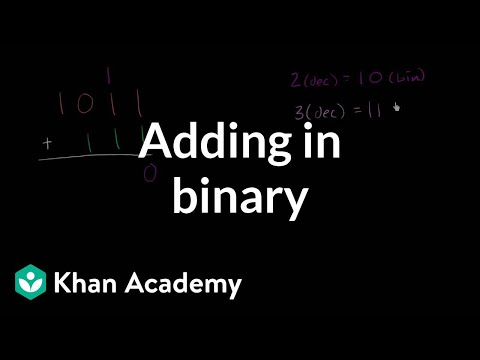

In [239]:
from IPython.display import YouTubeVideo
YouTubeVideo("RgklPQ8rbkg", width="60%")

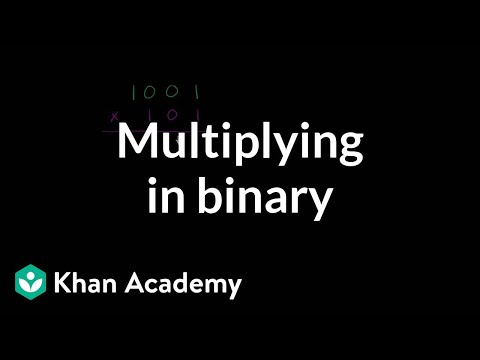

In [240]:
YouTubeVideo("xHWKYFhhtJQ", width="60%")

The video below explains the idea behind [Two's Complement](https://en.wikipedia.org/wiki/Two%27s_complement). This is how most modern programming languages implement negative integers. The video also shows how subtraction in binary works.

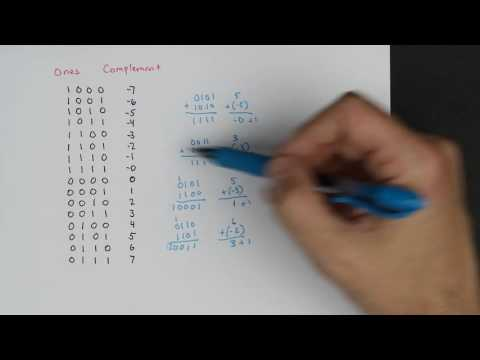

In [241]:
YouTubeVideo("4qH4unVtJkE", width="60%")

Below is a short introduction to [complex numbers](https://en.wikipedia.org/wiki/Complex_number) by [MIT](https://www.mit.edu) professor [Gilbert Strang](https://en.wikipedia.org/wiki/Gilbert_Strang) aimed at high school students.

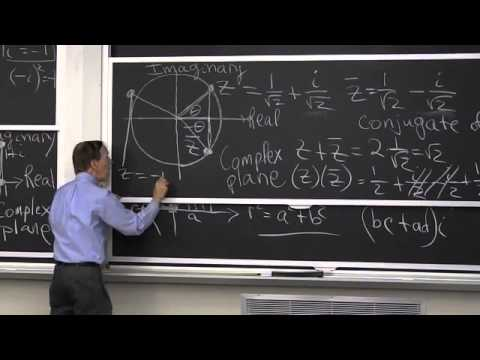

In [242]:
YouTubeVideo("Jkv-55ndVYY", width="60%")